In [1]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
iris=load_iris()
data=iris.data

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X=iris.data
y=iris.target
data_matrix=xgb.DMatrix(data=X,label=y)

In [8]:
X.dtype

dtype('float64')

In [9]:
seed=42
np.random.seed(seed)

In [10]:
#antes de llamar el modelo, dividimos los datos
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [11]:
#ahora creamos una instancia del modelo de Boosting (impulso)
xg_classif=xgb.XGBClassifier()

In [12]:
xg_classif.fit(x_train,y_train);

[21:51:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [13]:
preds=xg_classif.predict(x_test)

In [14]:
result_acc=accuracy_score(y_test,preds)
print("Precision: {0:.2f}%".format(result_acc*100,2))

Precision: 93.33%


In [15]:
from sklearn.metrics import classification_report

report=classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [16]:
params={
    "max_depth":5
}
cv_results=xgb.cv(dtrain=data_matrix,params=params,nfold=10,num_boost_round=50,as_pandas=True)

In [17]:
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
49,0.001157,0.000186,0.19666,0.119918


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

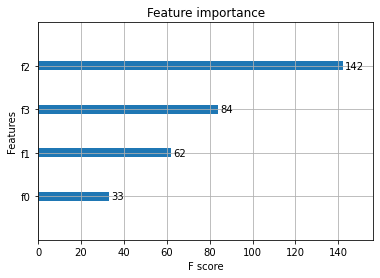

In [18]:
xgb.plot_importance(xg_classif)

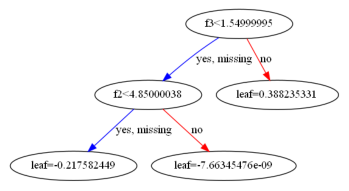

In [19]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_classif,num_trees=2)
plt.rcParams["figure.figsize"]=(10,10)
plt.show()

In [20]:
#metodos de seleccion de caracteristicas
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

X,y=load_iris(return_X_y=True)

rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=2)
rfe.fit(X,y);

In [21]:
rfe.ranking_

array([3, 2, 1, 1])

In [22]:
rfe.support_

array([False, False,  True,  True])

In [23]:
[idx for idx,val in enumerate(rfe.support_) if val]

[2, 3]

### Seleccion de caracteristicas de manera automatica con RFECV

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold

X,y=make_classification(n_samples=10000,n_features=50,n_classes=2)
base_model=LogisticRegression(max_iter=1000)
rfecv=RFECV(estimator=base_model,cv=StratifiedKFold(n_splits=10))

In [25]:
rfecv.fit(X,y);

In [26]:
rfecv.support_


array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False])

In [27]:
rfecv.ranking_

array([15, 29,  1, 18, 23, 44,  5,  7,  8, 25, 36, 43,  1,  1, 22, 24,  1,
        9, 10, 32, 13, 38, 27, 28,  6, 11,  1, 20, 40, 30, 26, 31, 39, 45,
       42, 37, 21, 41,  1, 17, 19, 35, 34, 14,  4, 12, 16, 33,  3,  2])

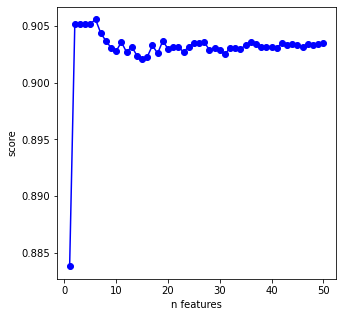

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(5,5)
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_,"bo-")
plt.xlabel("n features")
plt.ylabel("score")
plt.show()

In [29]:
columns_selected=[idx for idx,_ in enumerate(rfecv.support_) if _]

In [30]:
columns_selected

[2, 12, 13, 16, 26, 38]

In [31]:
sum(rfecv.support_)

6

<AxesSubplot:>

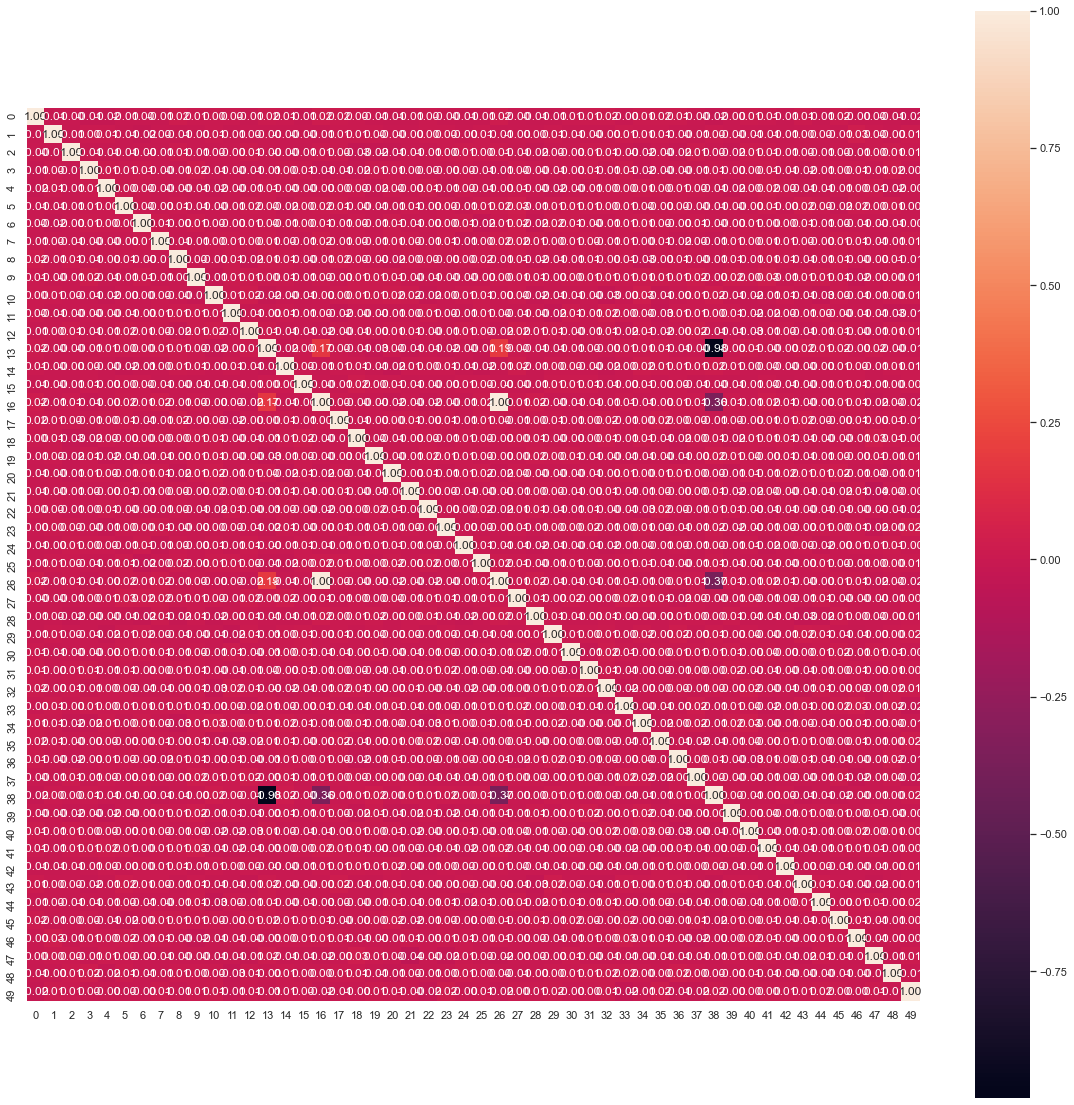

In [40]:
import pandas as pd
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"]=(20,20)

data_corr=pd.DataFrame(X).corr(method="pearson") #colocamos la matriz en un objeto dataframe
sns.heatmap(data_corr,square=True,annot=True,fmt="0.2f")


In [53]:
abs(data_corr.iloc[:,[49]]).sort_values(by=49,ascending=False)

,49
49,1.000000
22,0.023221
33,0.022428
35,0.020899
37,0.020758
26,0.018620
16,0.018453
23,0.017779
38,0.016226
44,0.016010
